In [1]:
import numpy as np # numpy library used mainly for linear algebra
import pandas as pd # pandas library used to read and manipulate tabular data

# define random seed for reproducibility we will use it in other instances in the code
seed = 17
np.random.seed(seed)

# load our data
print("loading our dataset please wait..")
root_dir = "../datasets/reducing-commercial-aviation-fatalities/" # the root directory of the dataset
df_train = pd.read_csv(root_dir + "train.csv") # load training data
df_test = pd.read_csv(root_dir + "test.csv") # load testing data

loading our dataset please wait..


# EDA

In [2]:
# explore the training and testing data
print(df_train.head())
print(df_test.head())

   crew experiment      time  seat   eeg_fp1     eeg_f7     eeg_f8     eeg_t4  \
0     1         CA  0.011719     1  -5.28545  26.775801  -9.527310 -12.793200   
1     1         CA  0.015625     1  -2.42842  28.430901  -9.323510  -3.757230   
2     1         CA  0.019531     1  10.67150  30.420200  15.350700  24.724001   
3     1         CA  0.023438     1  11.45250  25.609800   2.433080  12.412500   
4     1         CA  0.027344     1   7.28321  25.942600   0.113564   5.748000   

      eeg_t6     eeg_t5  ...     eeg_c4     eeg_p4    eeg_poz   eeg_c3  \
0  16.717800  33.737499  ...  37.368999  17.437599  19.201900  20.5968   
1  15.969300  30.443600  ...  31.170799  19.399700  19.689501  21.3547   
2  16.143101  32.142799  ... -12.012600  19.396299  23.171700  22.4076   
3  20.533300  31.494101  ...  18.574100  23.156401  22.641199  19.3367   
4  19.833599  28.753599  ...   6.555440  22.754700  22.670300  20.2932   

    eeg_cz     eeg_o2     ecg           r         gsr  event  
0 -3.

In [3]:
# get the unique values to categorize the dataframes

crew_ids = df_train["crew"].unique()
print("crew ids: {}".format(crew_ids))

experiment_ids = df_train["experiment"].unique()
print("experiment ids: {}".format(experiment_ids))

seat_ids = df_train["seat"].unique()
print("seat ids: {}".format(seat_ids))


crew ids: [ 1  2  3  4  5  6  7  8 13]
experiment ids: ['CA' 'DA' 'SS']
seat ids: [1 0]




*   crew - a unique id for a pair of pilots. There are 9 crews in the data.
*   experiment - One of CA, DA, SS or LOFT. The first 3 comprise the training set. The latter the test set.
* seat - is the pilot in the left (0) or right (1) seat
*  time - seconds into the experiment


---


As mentionned in the data description of the competition, each of the 18 pilots was recorded over time and subjected to the CA, DA, or SS cognitive states. The training set contains three experiments (one for each state) in which the pilots experienced just one of the states.

Thus, we have to hierarchically group the training data by :

crew
seat (pilot)
experiment


---



let's visualize the data by categorizing it using those attributes






In [4]:
# categorize and map with intergers

dic_exp = {'CA': 2, 'DA': 3, 'SS': 1, 'LOFT': 4}
# A = baseline, B = SS, C = CA, D = DA
dic_event = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

labels_exp = {v: k for k, v in dic_exp.items()}
labels_event = {v: k for k, v in dic_event.items()}

df_train["event"] = df_train["event"].apply(lambda x: dic_event[x])
df_train["event"] = df_train["event"].astype('int8')
df_train['experiment'] = df_train['experiment'].apply(lambda x: dic_exp[x])
df_test['experiment'] = df_test['experiment'].apply(lambda x: dic_exp[x])

df_train['experiment'] = df_train['experiment'].astype('int8')
df_test['experiment'] = df_test['experiment'].astype('int8')

In [7]:
# indexing the df_train with pilots and experiments
DF_train = df_train.set_index(['crew', 'seat', 'experiment']).sort_values(by=['time']).sort_index()
DF_train.head()

time   eeg_fp1   eeg_f7     eeg_f8    eeg_t4  \
crew seat experiment                                                     
1    0    1           0.105469  0.295082  1.41525   6.017000  17.43700   
          1           0.109375  0.476633  2.72228   0.847142  14.01520   
          1           0.113281  3.684180  3.93818  12.643100  -4.39667   
          1           0.117188  0.109571  9.36773   6.218960   8.70419   
          1           0.121094 -8.325240  0.09231 -12.381200  10.02280   

                        eeg_t6     eeg_t5     eeg_t3   eeg_fp2    eeg_o1  ...  \
crew seat experiment                                                      ...   
1    0    1          -12.07990  12.174100 -13.848400  -1.52518 -17.39020  ...   
          1            2.70650   0.204422  18.998301   0.62022 -11.72300  ...   
          1            5.74710  -2.799160  -1.147560   4.84818  -7.18645  ...   
          1           -1.12832   3.268290  32.350101  -1.40875  -9.82008  ...   
          1          -12.18860 -11.063500   6.851300 -10.00620 -10.13210  ...   

                        eeg_c4     eeg_p4   eeg_poz     eeg_c3     eeg_cz  \
crew seat experiment                                                        
1    0    1           0.707906 -14.889000 -11.64640   0.130864  -2.535960   
          1           5.684170  -8.636940  -8.74823  -0.311945  -0.935266   
          1           7.089600  -3.781270  -4.31087   2.438840  -0.359973   
          1           4.495600 -10.584900  -8.98046   2.306150  -3.665160   
          1          -5.983560 -16.184401 -11.57130 -14.032700 -11.525400   

                       eeg_o2           ecg           r         gsr  event  
crew seat experiment                                                        
1    0    1          -17.0832 -12883.299805  656.463989  794.674011      0  
          1          -14.0005 -12883.299805  656.463989  794.674011      0  
          1           -7.6219 -12884.799805  656.434021  794.499023      0  
          1          -12.0079 -12884.799805  656.434021  794.499023      0  
          1          -13.5701 -12884.799805  656.434021  794.499023      0  

[5 rows x 25 columns]

In [8]:
# retrieve one pilot
pilot = DF_train.loc[1, 0]
pilot.head()

,time,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
experiment,,,,,,,,,,,,,,,,,,,,,
1,0.105469,0.295082,1.41525,6.017000,17.43700,-12.07990,12.174100,-13.848400,-1.52518,-17.39020,...,0.707906,-14.889000,-11.64640,0.130864,-2.535960,-17.0832,-12883.299805,656.463989,794.674011,0
1,0.109375,0.476633,2.72228,0.847142,14.01520,2.70650,0.204422,18.998301,0.62022,-11.72300,...,5.684170,-8.636940,-8.74823,-0.311945,-0.935266,-14.0005,-12883.299805,656.463989,794.674011,0
1,0.113281,3.684180,3.93818,12.643100,-4.39667,5.74710,-2.799160,-1.147560,4.84818,-7.18645,...,7.089600,-3.781270,-4.31087,2.438840,-0.359973,-7.6219,-12884.799805,656.434021,794.499023,0
1,0.117188,0.109571,9.36773,6.218960,8.70419,-1.12832,3.268290,32.350101,-1.40875,-9.82008,...,4.495600,-10.584900,-8.98046,2.306150,-3.665160,-12.0079,-12884.799805,656.434021,794.499023,0
1,0.121094,-8.325240,0.09231,-12.381200,10.02280,-12.18860,-11.063500,6.851300,-10.00620,-10.13210,...,-5.983560,-16.184401,-11.57130,-14.032700,-11.525400,-13.5701,-12884.799805,656.434021,794.499023,0


In [9]:
# constructing a visualizing tool for our needs
# areas colors corresponding to the event state of the pilot
# baseline: gray, CA: green, SS: red, DA: blue
import matplotlib.pyplot as plt

# areas colors corresponding to the event state of the pilot
# baseline: gray, SS: red, CA: green, DA: blue
event_colors = {0: 'gray', 1: 'red', 2: 'green', 3: 'blue'}

def plot_ts(pilot_data, features, exp=0):
    exp_data = pilot_data.loc[exp]
    
    ax = exp_data.plot(
         kind='line',
         x='time', 
         y=features, 
         figsize=(15,5), 
         linewidth=2.
    )
    changes = exp_data[exp_data.event.diff().abs()>0][['time', 'event']].values
    times = [0] + list(changes[:, 0]) + [exp_data.time.max()]
    events = [exp_data.event.iloc[0]] + list(changes[:, 1])
    for i in range(len(times)-1):
        event = events[i]
        ax.axvspan(times[i], times[i+1], facecolor=event_colors[event], alpha=0.1)
    
    plt.show()

Here is the time evolution of the feature event over time, which are also represented by the color backgrounds, so we can assure that the plotting function is correct.

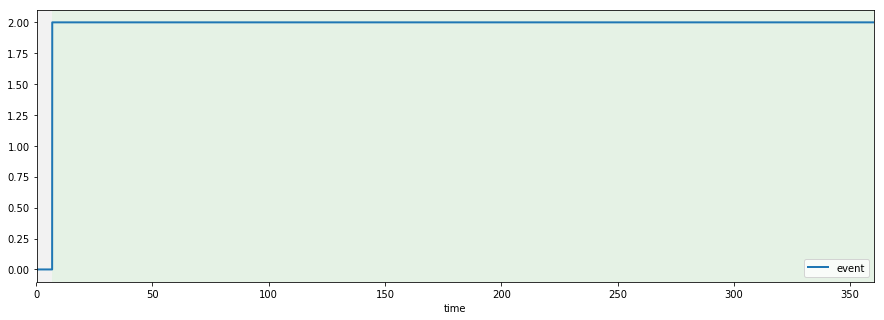

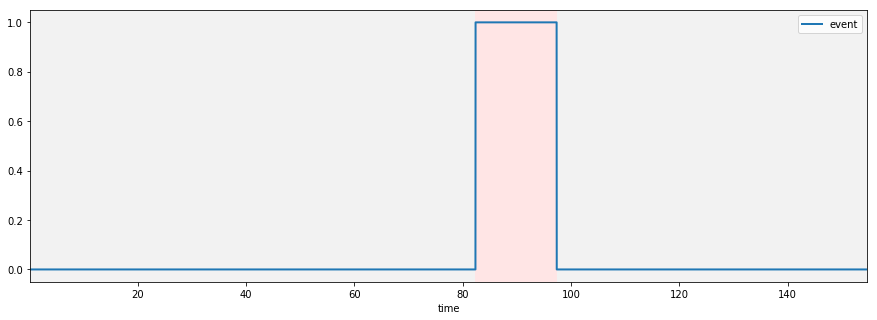

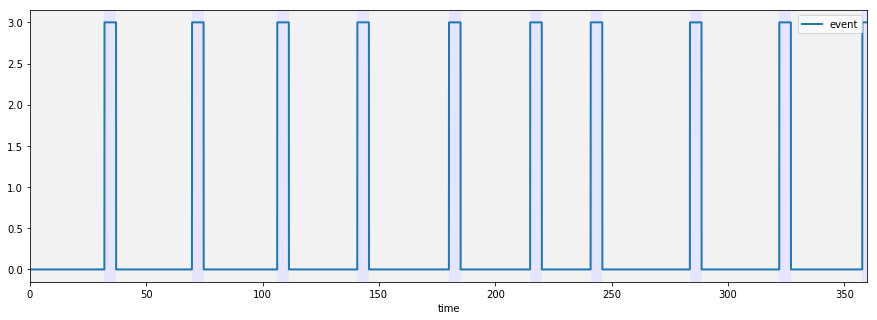

In [10]:
plot_ts(pilot_data=pilot, features='event', exp=dic_exp["CA"])
plot_ts(pilot_data=pilot, features='event', exp=dic_exp["SS"])
plot_ts(pilot_data=pilot, features='event', exp=dic_exp["DA"])

As you can see this the changes of the events according to the experiments.

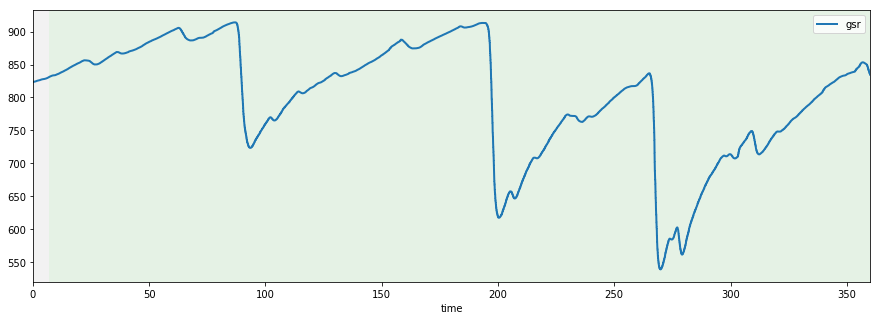

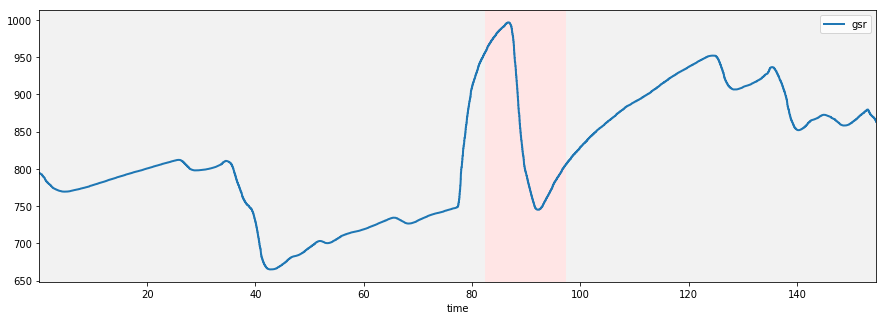

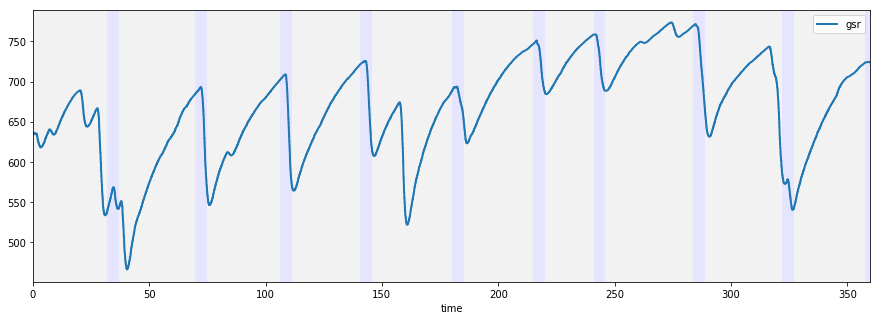

In [11]:
plot_ts(pilot_data=pilot, features='gsr', exp=dic_exp["CA"])
plot_ts(pilot_data=pilot, features='gsr', exp=dic_exp["SS"])
plot_ts(pilot_data=pilot, features='gsr', exp=dic_exp["DA"])

Here is an example of visualization of gsr signals

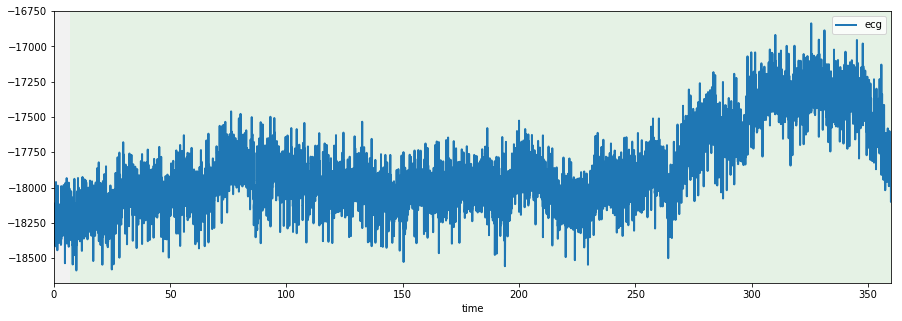

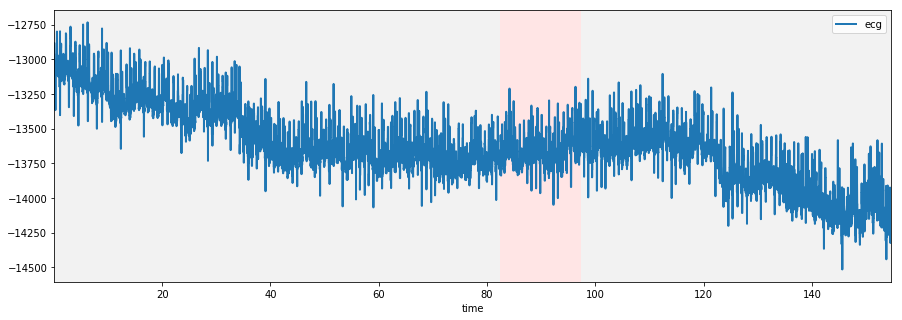

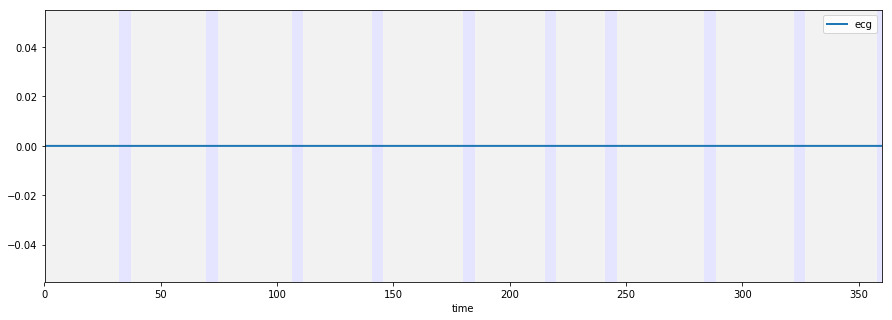

In [12]:
plot_ts(pilot_data=pilot, features='ecg', exp=dic_exp["CA"])
plot_ts(pilot_data=pilot, features='ecg', exp=dic_exp["SS"])
plot_ts(pilot_data=pilot, features='ecg', exp=dic_exp["DA"])

You can visualize anything using the plot_ts function 


Here is a very good example to see the data


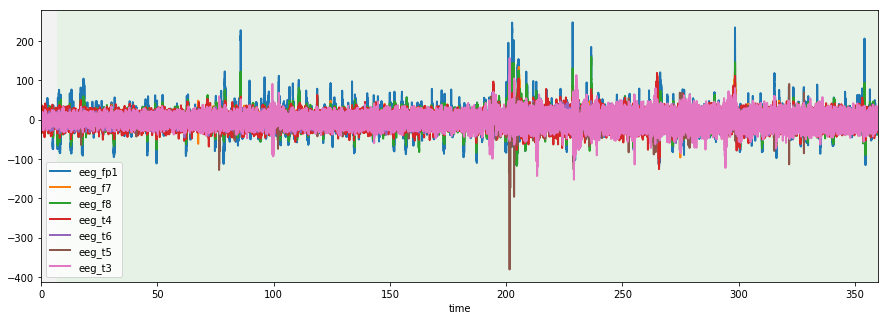

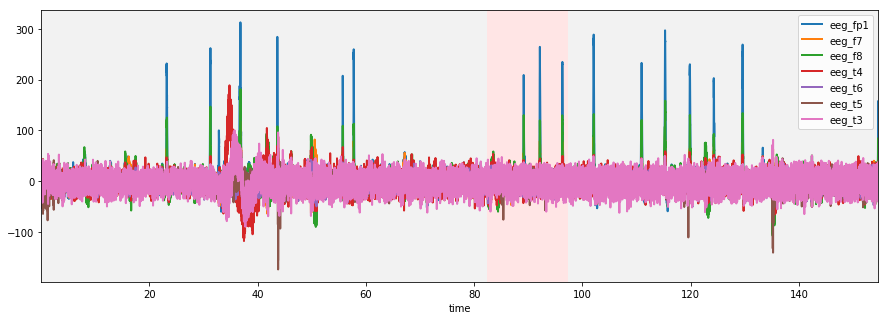

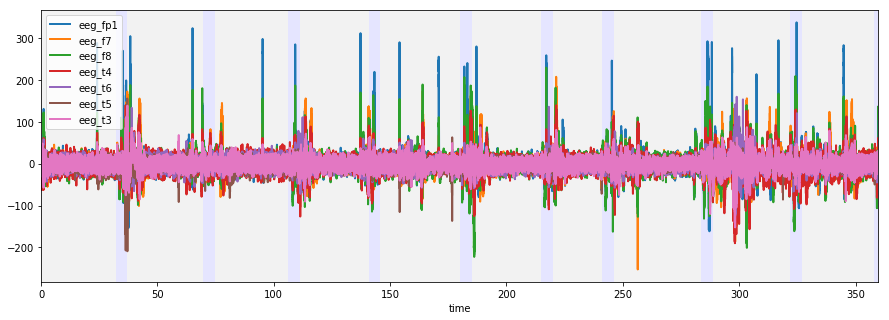

In [13]:
f = ["eeg_fp1","eeg_f7","eeg_f8","eeg_t4","eeg_t6","eeg_t5","eeg_t3"]

plot_ts(pilot_data=pilot, features=f, exp=dic_exp["CA"])
plot_ts(pilot_data=pilot, features=f, exp=dic_exp["SS"])
plot_ts(pilot_data=pilot, features=f, exp=dic_exp["DA"])

Let's take some of features and try to understand

like ecg which was so noisy

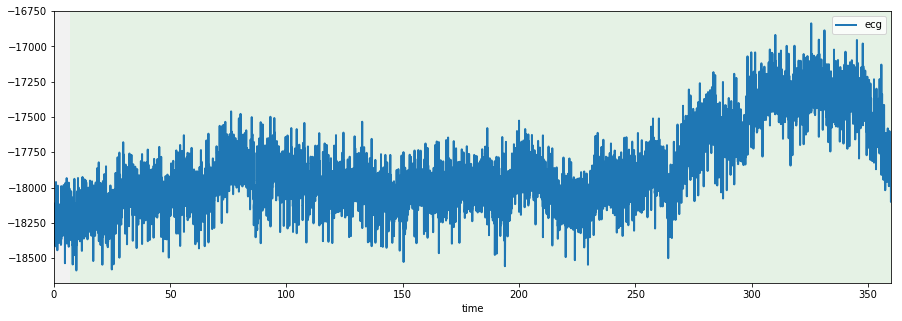

In [14]:
plot_ts(pilot_data=pilot, features='ecg', exp=dic_exp["CA"])

We can use biosppy library which can help us in this



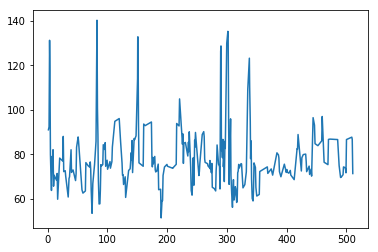

In [15]:
from biosppy import ecg

ecg_out = ecg.ecg(signal=pilot['ecg'].values, sampling_rate=256., show=False)
plt.plot(ecg_out['heart_rate_ts'], ecg_out['heart_rate'])

Let's get to know our data more and relation between everything


In [16]:
import seaborn as sns

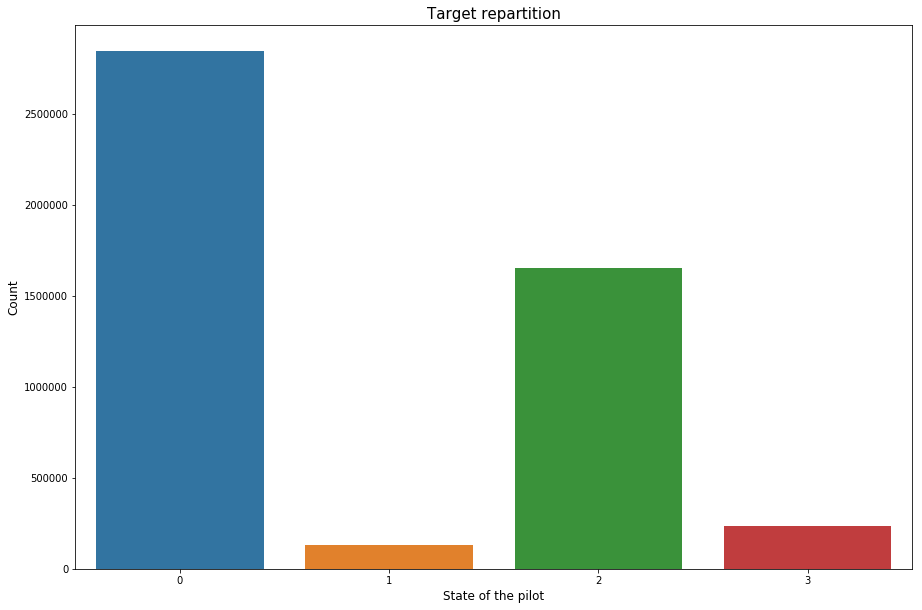

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(df_train['event'])
plt.xlabel("State of the pilot", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Target repartition", fontsize=15)
plt.show()

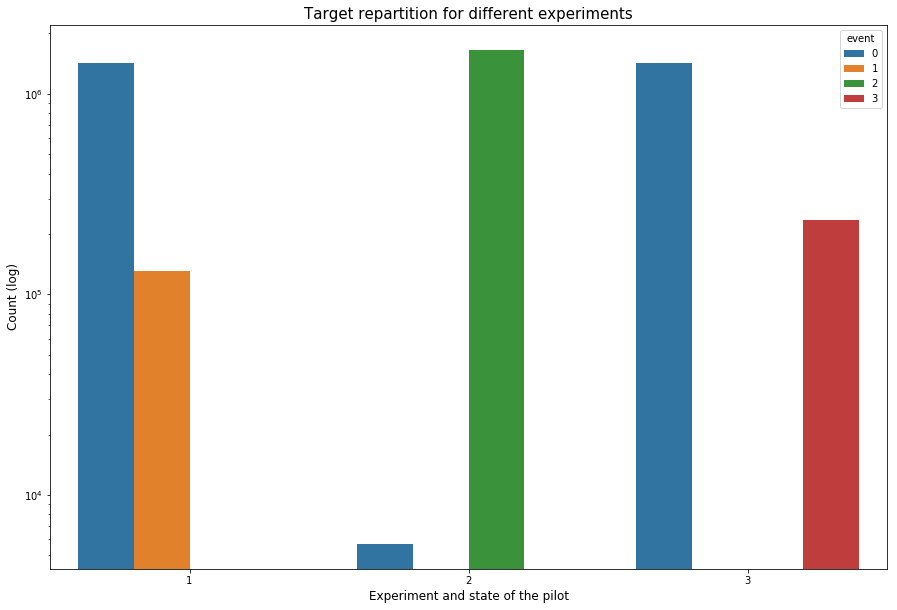

In [18]:
plt.figure(figsize=(15,10))
sns.countplot('experiment', hue='event', data=df_train)
plt.xlabel("Experiment and state of the pilot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.yscale('log')
plt.title("Target repartition for different experiments", fontsize=15)
plt.show()


The experiment of the test set is LOFT (Line Oriented Flight Training), which is a full flight (take off, flight, and landing) in a flight simulator.

Seat
Which seat the pilot is sitting in.

0 : left seat
1 : right seat
This probably has nothing to do with the outcome of the experiment though.

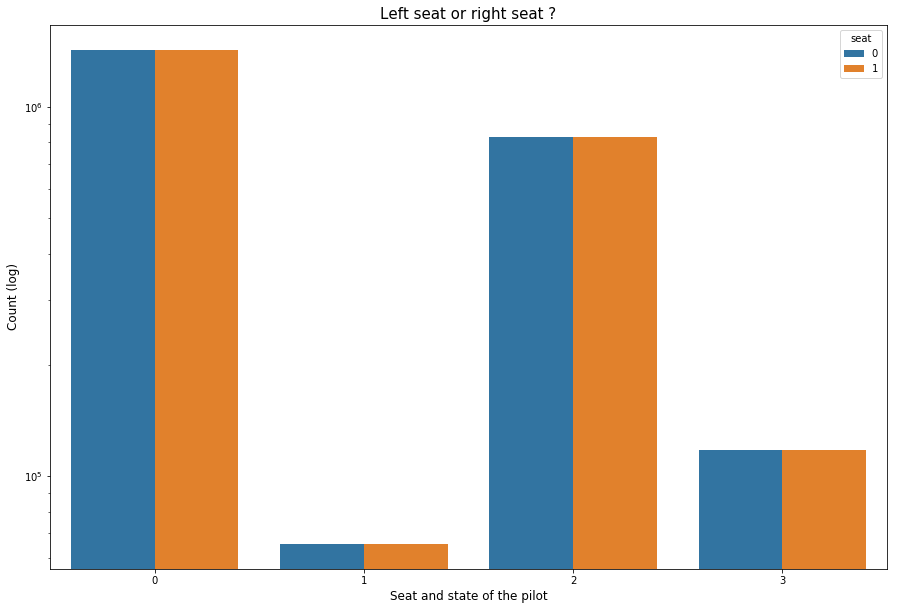

In [19]:
plt.figure(figsize=(15,10))
sns.countplot('event', hue='seat', data=df_train)
plt.xlabel("Seat and state of the pilot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.yscale('log')
plt.title("Left seat or right seat ?", fontsize=15)
plt.show()

Time of the experiment¶


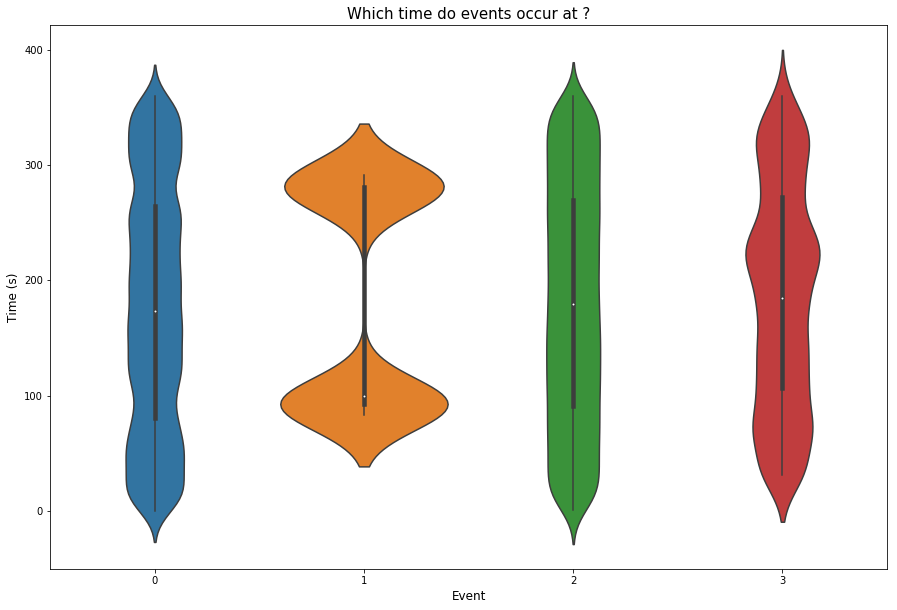

In [20]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='time', data=df_train.sample(50000))
plt.ylabel("Time (s)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Which time do events occur at ?", fontsize=15)
plt.show()

Data set of test time
Data set of train time

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


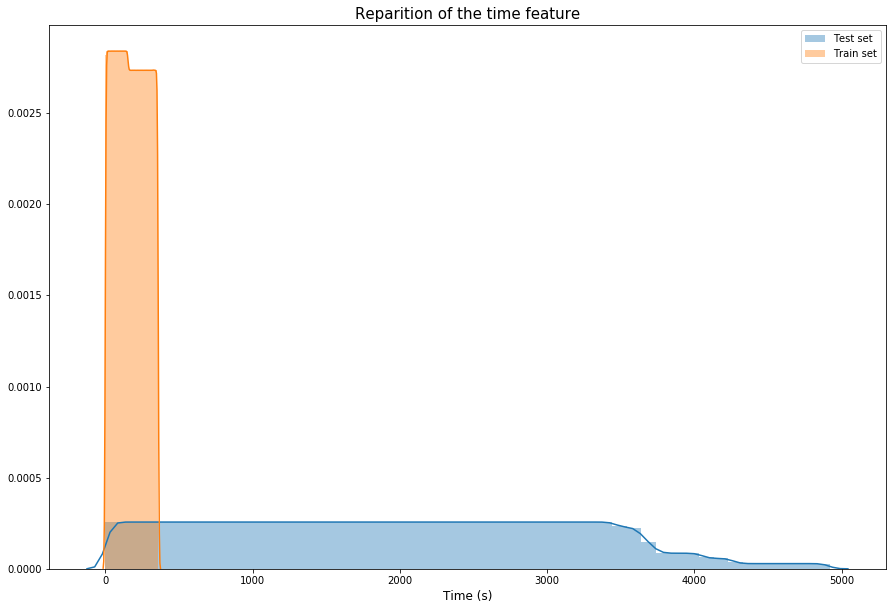

In [21]:
plt.figure(figsize=(15,10))
sns.distplot(df_test['time'], label='Test set')
sns.distplot(df_train['time'], label='Train set')
plt.legend()
plt.xlabel("Time (s)", fontsize=12)
plt.title("Reparition of the time feature", fontsize=15)
plt.show()

### Electroencephalogram recordings

In [22]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

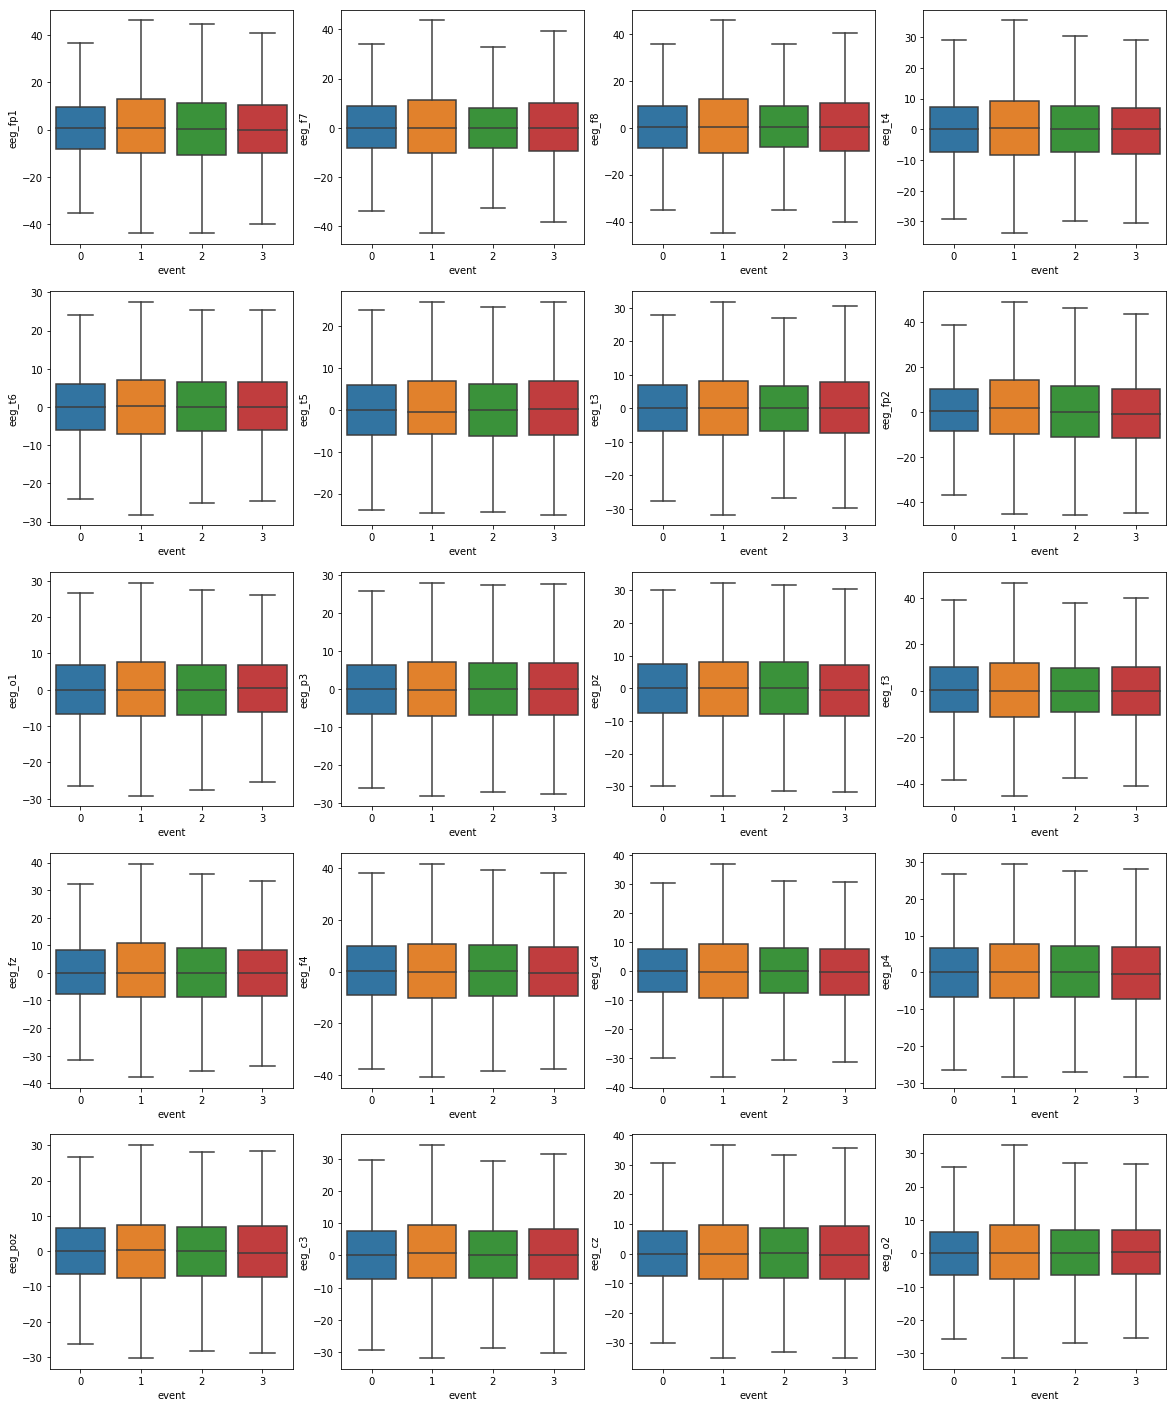

In [23]:
plt.figure(figsize=(20,25))
i = 0

for egg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.boxplot(x='event', y=egg, data=df_train.sample(50000), showfliers=False)

plt.show()

We Also check if features have the same distribution on the test and train set

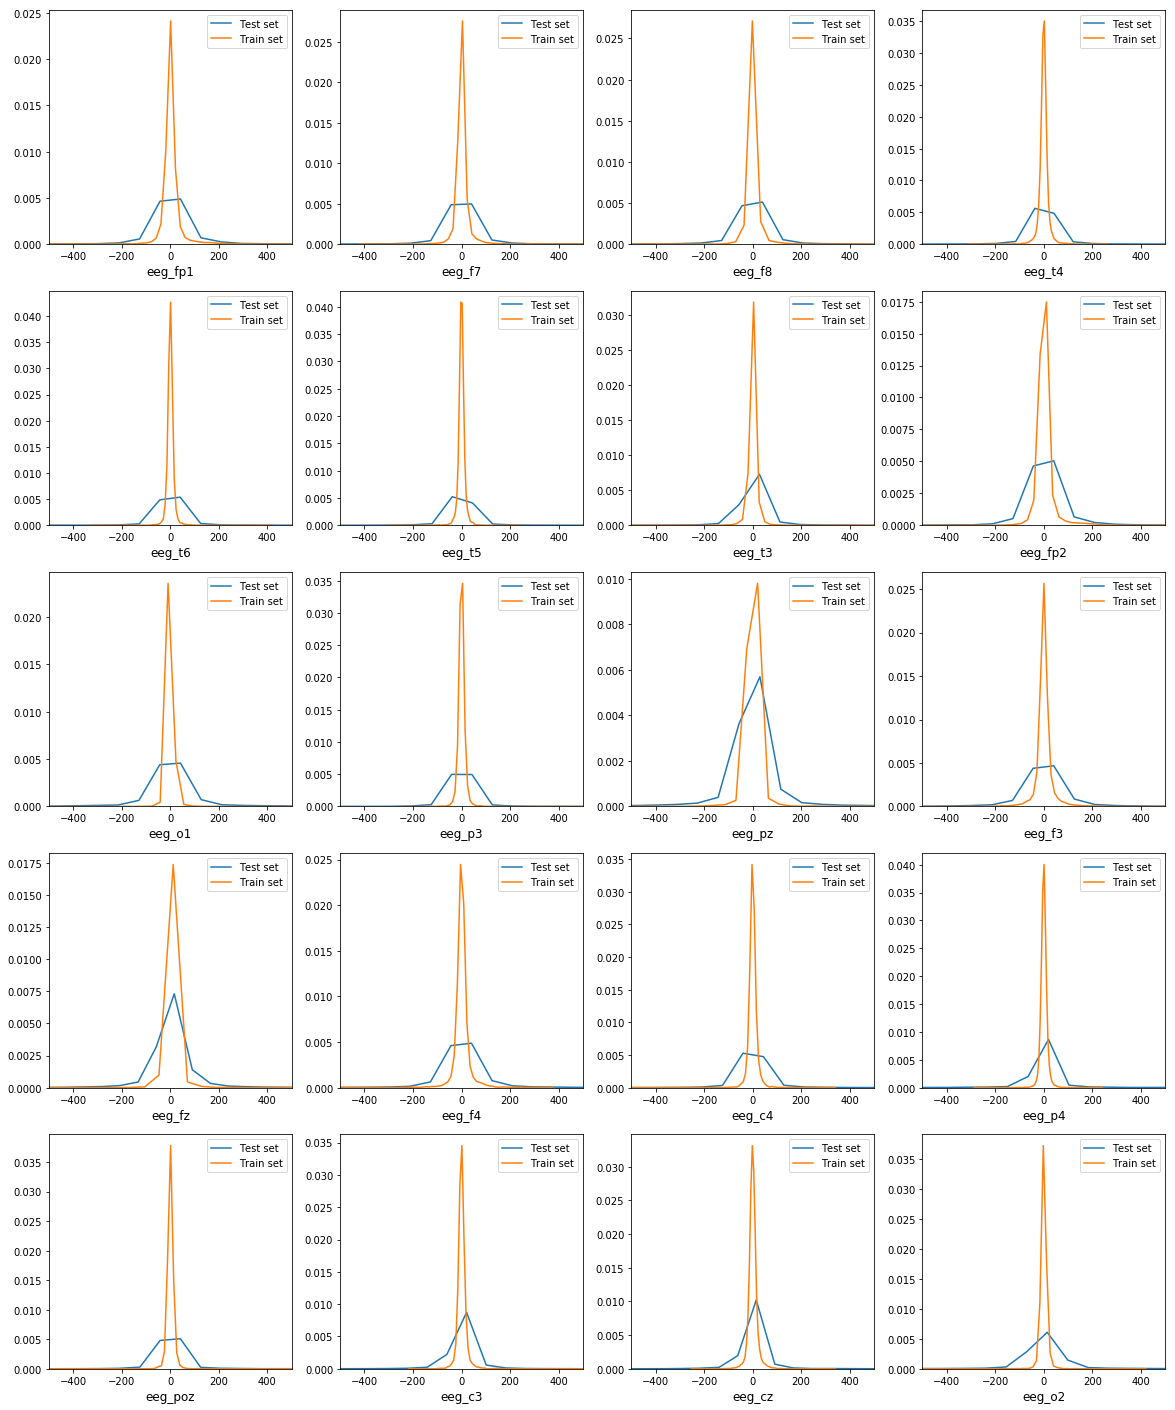

In [24]:
plt.figure(figsize=(20,25))
plt.title('Eeg features distributions')
i = 0

for eeg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.distplot(df_test.sample(10000)[eeg], label='Test set', hist=False)
    sns.distplot(df_train.sample(10000)[eeg], label='Train set', hist=False)
    plt.xlim((-500, 500))
    plt.legend()
    plt.xlabel(eeg, fontsize=12)

plt.show()

Reparitions seem consistent :  Gaussians with a sinusoïdal noise centered at 0. Note that the variance is larger on the test set.

### Electrocardiogram
- 3-point Electrocardiogram signal. The sensor had a resolution/bit of .012215 µV and a range of -100mV to +100mV. The data are provided in microvolts.

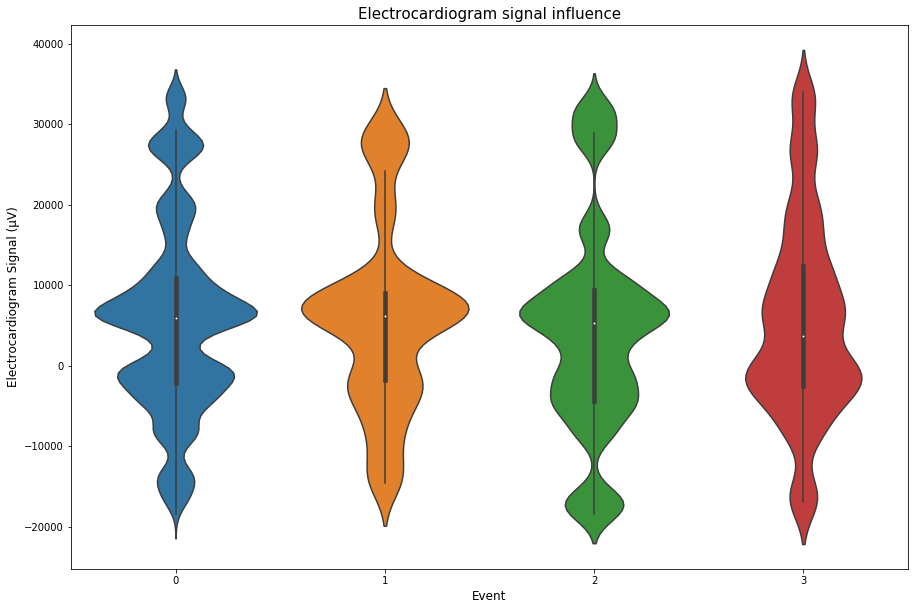

In [25]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='ecg', data=df_train.sample(50000))
plt.ylabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Electrocardiogram signal influence", fontsize=15)
plt.show()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


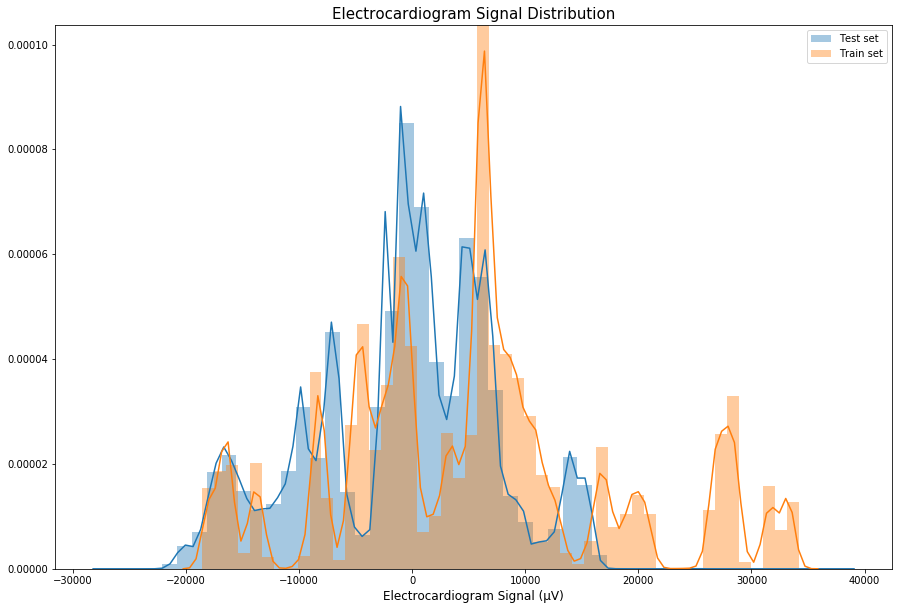

In [26]:
plt.figure(figsize=(15,10))
sns.distplot(df_test['ecg'], label='Test set')
sns.distplot(df_train['ecg'], label='Train set')
plt.legend()
plt.xlabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.title("Electrocardiogram Signal Distribution", fontsize=15)
plt.show()

Except foir the >20000-ish samples, train/test repartitions are similar.

### Respiration 
- A measure of the rise and fall of the chest. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.

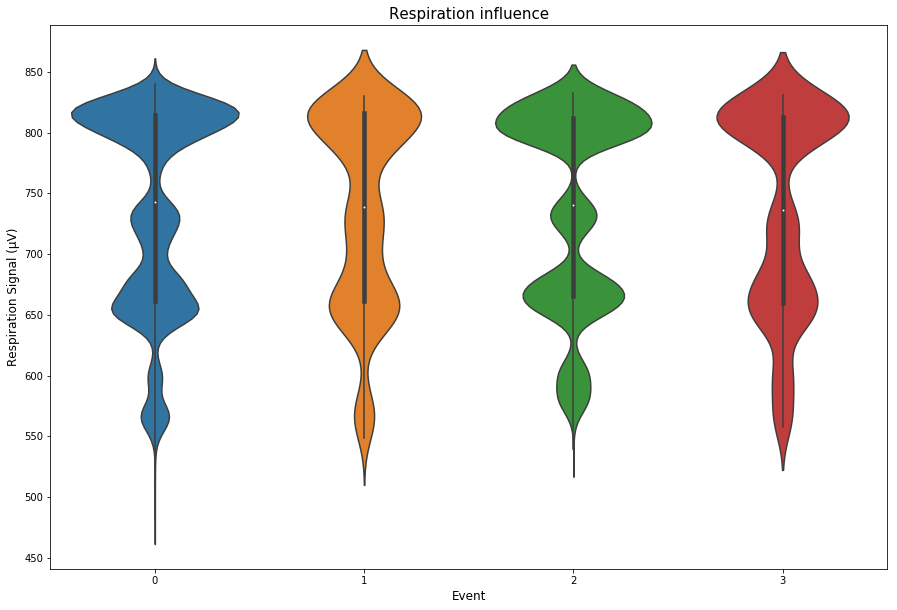

In [27]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='r', data=df_train.sample(50000))
plt.ylabel("Respiration Signal (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Respiration influence", fontsize=15)
plt.show()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


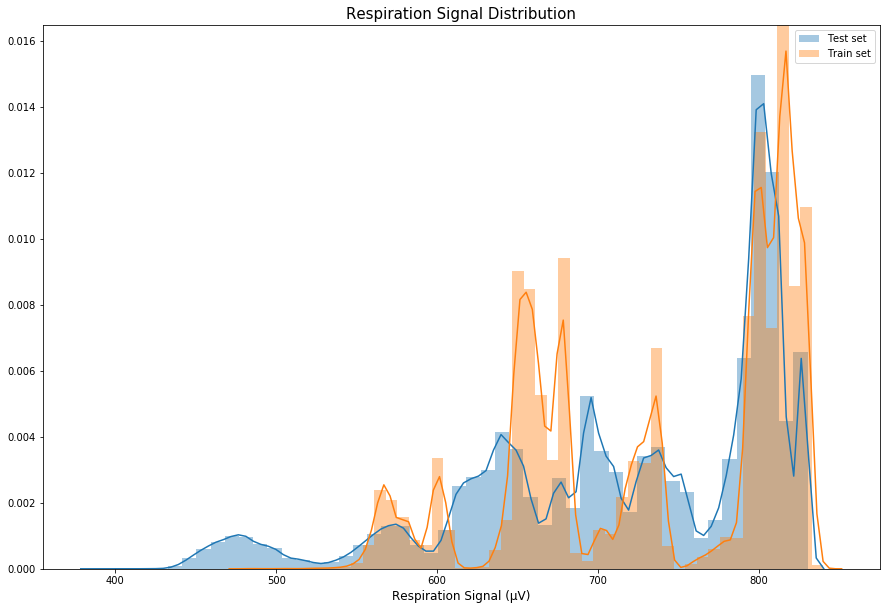

In [28]:
plt.figure(figsize=(15,10))
sns.distplot(df_test['r'], label='Test set')
sns.distplot(df_train['r'], label='Train set')
plt.legend()
plt.xlabel("Respiration Signal (µV)", fontsize=12)
plt.title("Respiration Signal Distribution", fontsize=15)
plt.show()

Nothing much to say here, the test set has a bunch of sample with lower values though.

### Galvanic Skin Response
 - A measure of electrodermal activity. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.
 > "The galvanic skin response (GSR, which falls under the umbrella term of electrodermal activity, or EDA) refers to changes in sweat gland activity that are reflective of the intensity of our emotional state, otherwise known as emotional arousal."

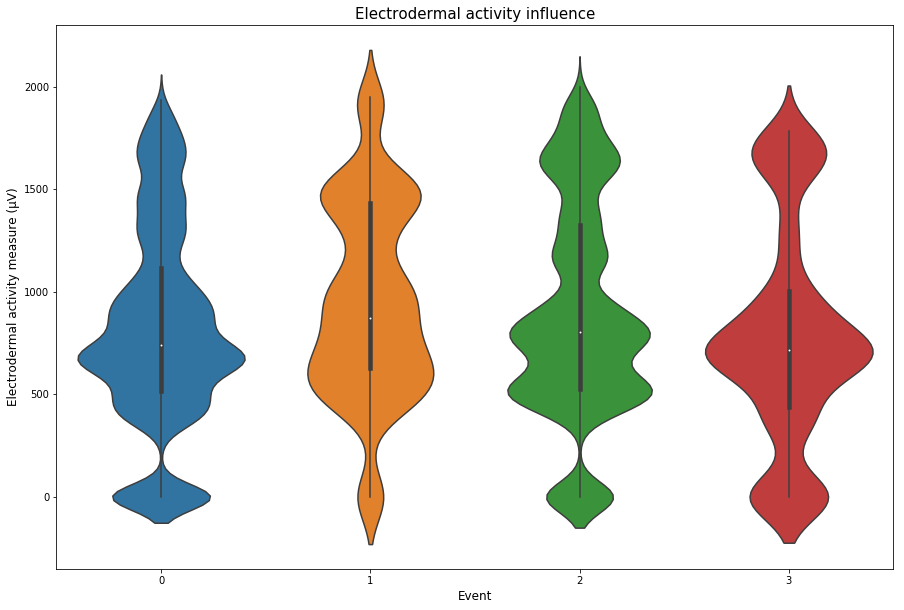

In [29]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='gsr', data=df_train.sample(50000))
plt.ylabel("Electrodermal activity measure (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Electrodermal activity influence", fontsize=15)
plt.show()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


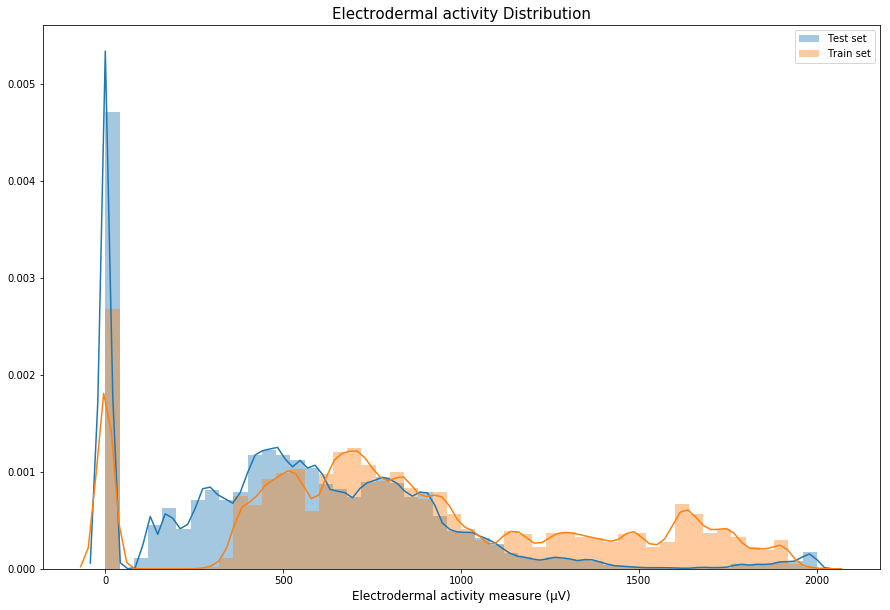

In [30]:
plt.figure(figsize=(15,10))
sns.distplot(df_test['gsr'], label='Test set')
sns.distplot(df_train['gsr'], label='Train set')
plt.legend()
plt.xlabel("Electrodermal activity measure (µV)", fontsize=12)
plt.title("Electrodermal activity Distribution", fontsize=15)
plt.show()

# Preprocessing the dataset for the training and model benchmarking




In [5]:
# let's see the dataframes again to revise them
print(df_train.head())
print(df_test.head())

   crew  experiment      time  seat   eeg_fp1     eeg_f7     eeg_f8  \
0     1           2  0.011719     1  -5.28545  26.775801  -9.527310   
1     1           2  0.015625     1  -2.42842  28.430901  -9.323510   
2     1           2  0.019531     1  10.67150  30.420200  15.350700   
3     1           2  0.023438     1  11.45250  25.609800   2.433080   
4     1           2  0.027344     1   7.28321  25.942600   0.113564   

      eeg_t4     eeg_t6     eeg_t5  ...     eeg_c4     eeg_p4    eeg_poz  \
0 -12.793200  16.717800  33.737499  ...  37.368999  17.437599  19.201900   
1  -3.757230  15.969300  30.443600  ...  31.170799  19.399700  19.689501   
2  24.724001  16.143101  32.142799  ... -12.012600  19.396299  23.171700   
3  12.412500  20.533300  31.494101  ...  18.574100  23.156401  22.641199   
4   5.748000  19.833599  28.753599  ...   6.555440  22.754700  22.670300   

    eeg_c3   eeg_cz     eeg_o2     ecg           r         gsr  event  
0  20.5968 -3.95115  14.507600 -4520.0  817.

Get the numpys ready

Just another check 
That the same number of pilots

In [6]:
x_pilots = 20 * df_train['seat'] + df_train['crew']
xx_pilots = 20 * df_test['seat'] + df_test['crew']

print("Number of train pilots : ", len(x_pilots.unique()))
print("Number of test pilots : ", len(xx_pilots.unique()))

Number of train pilots :  18
Number of test pilots :  18


In [7]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
df_train = reduce_mem_usage(df_train)
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 974.81 MB
Memory usage after optimization is: 241.38 MB
Decreased by 75.2%
Memory usage of dataframe is 3717.84 MB
Memory usage after optimization is: 942.31 MB
Decreased by 74.7%


In [9]:
features_n = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6",
              "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", 
              "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4",
              "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2",
              "ecg", "r", "gsr"]

In [13]:
# adding the pilot column in the dataframe
df_train['pilot'] = 100 * df_train['seat'] + df_train['crew']
df_test['pilot'] = 100 * df_test['seat'] + df_test['crew']
print("Number of pilots : ", len(df_train['pilot'].unique()))

Number of pilots :  18


This dataset has a different nature and should be normalized by pilot.
So we will create a function to normalize the dataset by pilot.
We should normalize the test dataset as the train dataset

In [16]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
def normalize_by_pilots(train_df, test_df):
    pilots = train_df["pilot"].unique()
    for pilot in tqdm(pilots):
        ids = train_df[train_df["pilot"] == pilot].index
        scaler = MinMaxScaler()
        train_df.loc[ids, features_n] = scaler.fit_transform(train_df.loc[ids, features_n])
        test_df.loc[ids, features_n] = scaler.transform(test_df.loc[ids, features_n])
        
    return train_df, test_df

In [17]:
train_df, test_df = normalize_by_pilots(df_train, df_test)

100%|██████████| 18/18 [01:16<00:00,  4.24s/it]


Train\Val splitting

As we had seen there is different counts of the observations by states. So dataset is disbalanced. In such case for Train\Val splitting better to use StratifiedShuffleSplit method for proportional splitting by all classes

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split.split(train_df,train_df["event"]):
    strat_train = train_df.loc[train_index]
    strat_val = train_df.loc[val_index]

# Models


## Sklearn Models

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from time import time
import lightgbm as lgb

In [22]:
x_train = strat_train[features_n]
y_train = strat_train['event']
x_val = strat_val[features_n]
y_val = strat_val['event']

print(x_train.head(2))
print(y_train.head(2))
print(x_test.head(2))
print(y_test.head(2))

          eeg_fp1    eeg_f7    eeg_f8    eeg_t4    eeg_t6    eeg_t5    eeg_t3  \
7831     0.596191  0.591309  0.623535  0.632324  0.614258  0.631348  0.619141   
3168419  0.390137  0.445801  0.349121  0.462891  0.339111  0.640137  0.538574   

          eeg_fp2    eeg_o1    eeg_p3  ...    eeg_f4    eeg_c4    eeg_p4  \
7831     0.616699  0.606934  0.604004  ...  0.630859  0.612793  0.612793   
3168419  0.456787  0.635742  0.610840  ...  0.335938  0.461426  0.547363   

          eeg_poz    eeg_c3    eeg_cz    eeg_o2       ecg         r       gsr  
7831     0.615234  0.600098  0.500977  0.349609  0.456787  0.538574  0.637207  
3168419  0.600586  0.480957  0.508789  0.488770  0.712402  0.583984  0.139404  

[2 rows x 23 columns]
7831       2
3168419    0
Name: event, dtype: int8
          eeg_fp1    eeg_f7    eeg_f8    eeg_t4    eeg_t6    eeg_t5    eeg_t3  \
2969624  0.402588  0.355469  0.387207  0.502441  0.475342  0.551270  0.438232   
3450883  0.477051  0.367188  0.417236  0.530273  0.

Lets consider following models:

- Boosted Decision Trees (using lightgbm)
- Decision Tree Classifier
- Random Forest
- Multilayer Perceptron Classifier

In [30]:
classifiers = [
    lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05),
    DecisionTreeClassifier(max_depth=30),
    RandomForestClassifier(n_estimators=5, max_depth=20, random_state=0),
    MLPClassifier(hidden_layer_sizes=(100), max_iter=10, alpha=0.0001,
                      solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
]

df_metrics = pd.DataFrame(columns=['model', 'log_loss', 'accuracy', 'precision', 'recall'])

# iterate over classifiers
for clf in classifiers:
    print('_' * 80)
    print("Training: {}".format(clf))
    t0 = time()
    clf.fit(x_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(x_val)
    prob = clf.predict_proba(x_val)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    loss = log_loss(y_val, prob, labels=clf.classes_)
    print("Log loss: {}".format(loss))

    score = metrics.accuracy_score(y_val, pred)
    print("accuracy:   %0.3f" % score)
    
    pr_score = precision_score(y_val, pred, average='weighted')
    rc_score = recall_score(y_val, pred, average='weighted')
    
    df_metrics.loc[str(clf)] = [clf, loss, score, pr_score, rc_score]
    
    print("classification report:")
    print(metrics.classification_report(y_val, pred,
                                        target_names=["A","B","C","D"]))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_val, pred))

    print()
    clf_descr = str(clf).split('(')[0]

print(df_metrics)
df_metrics.to_csv("df_metrics.csv")

________________________________________________________________________________
Training: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
train time: 121.275s
test time:  15.976s
Log loss: 0.31754040067455047
accuracy:   0.902
classification report:
              precision    recall  f1-score   support

           A       0.87      0.98      0.92    569762
           B       0.95      0.20      0.32     26119
           C       0.97      0.94      0.95    330538
           D       0.97      0.02      0.04     47066

    accuracy                           0.90    973485
   macro av

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test time:  2.373s
Log loss: 0.42652037728111086
accuracy:   0.878


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           A       0.86      0.96      0.90    569762
           B       0.00      0.00      0.00     26119
           C       0.92      0.94      0.93    330538
           D       0.04      0.00      0.00     47066

    accuracy                           0.88    973485
   macro avg       0.45      0.47      0.46    973485
weighted avg       0.82      0.88      0.84    973485

confusion matrix:
[[545860      0  23881     21]
 [ 24374      0   1745      0]
 [ 21308      0 309226      4]
 [ 45492      0   1573      1]]

                                                                                                model  \
LGBMClassifier(boosting_type='gbdt', class_weig...  LGBMClassifier(boosting_type='gbdt', class_wei...   
DecisionTreeClassifier(class_weight=None, crite...  DecisionTreeClassifier(class_weight=None, crit...   
RandomForestClassifier(bootstrap=True, class_we...  (DecisionTreeClassifier(class_weight=None, cri...   
M

## Keras

In [31]:
# import numpys from the dataframes
x_train_np = x_train.values
y_train_np = y_train.values
x_val_np = x_val.values
y_val_np = y_val.values

In [33]:
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Dropout, ReLU
from keras.optimizers import Adam
from keras.regularizers import l2

input_features = Input(shape=(x_train.shape[1],)) 
dense_1_out = Dense(256, activation="relu",
                    use_bias=True, 
                    kernel_initializer='glorot_normal',
                    bias_initializer='zeros',
                    kernel_regularizer=l2(1e-5))(input_features)
dense_1_drop = Dropout(0.1)(dense_1_out)
dense_2_out = Dense(64, activation="relu",
                    use_bias=True, 
                    kernel_initializer='glorot_normal',
                    bias_initializer='zeros',
                    kernel_regularizer=l2(1e-5))(dense_1_drop)
dense_2_drop = Dropout(0.05)(dense_2_out)
logits = Dense(4, activation='softmax')(dense_2_drop) # 4 classes

# Finalizing the model by specifying the inputs and the outputs
model = Model(inputs=input_features, outputs=logits)

# Let's define our hyperparameters
learning_rate = 0.01
batch_size = 256
num_epochs = 10

optimizer = Adam(lr=learning_rate)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_np, y_train_np, batch_size=batch_size, epochs=num_epochs,
                    validation_data=(x_val_np,y_val_np), verbose=2)

# Plot the loss curves for training and validation 
plt.plot(history.history['loss'], color='r', label="training loss")
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation 
plt.plot(history.history['acc'], color='r', label="training accuracy")
plt.plot(history.history['val_acc'], color='b', label="validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

Train on 3893936 samples, validate on 973485 samples
Epoch 1/10
 - 42s - loss: 0.5097 - acc: 0.8300 - val_loss: 0.3957 - val_acc: 0.8753
Epoch 2/10
 - 42s - loss: 0.4451 - acc: 0.8575 - val_loss: 0.4034 - val_acc: 0.8733
Epoch 3/10
 - 42s - loss: 0.4319 - acc: 0.8633 - val_loss: 0.3645 - val_acc: 0.8880
Epoch 4/10
 - 42s - loss: 0.4270 - acc: 0.8657 - val_loss: 0.3719 - val_acc: 0.8841
Epoch 5/10
 - 42s - loss: 0.4252 - acc: 0.8665 - val_loss: 0.3706 - val_acc: 0.8871
Epoch 6/10
 - 42s - loss: 0.4251 - acc: 0.8671 - val_loss: 0.3686 - val_acc: 0.8873
Epoch 7/10
 - 42s - loss: 0.4248 - acc: 0.8671 - val_loss: 0.3740 - val_acc: 0.8861
Epoch 8/10
 - 42s - loss: 0.4249 - acc: 0.8673 - val_loss: 0.3953 - val_acc: 0.8757
Epoch 9/10
 - 42s - loss: 0.4251 - acc: 0.8676 - val_loss: 0.3679 - val_acc: 0.8898
Epoch 10/10
 - 42s - loss: 0.4250 - acc: 0.8677 - val_loss: 0.3684 - val_acc: 0.8877


<Figure size 640x480 with 1 Axes>

KeyError: 'accuracy'

### Example for submission to kaggle

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from time import time

### Train & Submit Random Forest Classifier

In [36]:
# Definition
random_forest_clf = RandomForestClassifier(n_estimators=7, max_depth=30, random_state=0)
# training
random_forest_clf.fit(x_train, y_train)
# metrics
pred = random_forest_clf.predict(x_val)
prob = random_forest_clf.predict_proba(x_val)
loss = log_loss(y_val, prob, labels=clf.classes_)
score = metrics.accuracy_score(y_val, pred)
print("Log loss: {}".format(loss))
print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_val, pred, target_names=["A","B","C","D"]))
print(metrics.confusion_matrix(y_val, pred))
# submission
prob_test_random_forest = random_forest_clf.predict_proba(test_df[features_n])

sub = pd.DataFrame(prob_test_random_forest, columns=['A', 'B', 'C', 'D'])
sub.to_csv('submission_random_forest.csv', index_label='id')

Log loss: 0.1194088555018348
accuracy:   0.963
              precision    recall  f1-score   support

           A       0.95      0.99      0.97    569762
           B       0.98      0.82      0.90     26119
           C       0.99      0.99      0.99    330538
           D       0.95      0.47      0.63     47066

    accuracy                           0.96    973485
   macro avg       0.97      0.82      0.87    973485
weighted avg       0.96      0.96      0.96    973485

[[566461    326   1953   1022]
 [  4421  21520    178      0]
 [  3208     14 327289     27]
 [ 24805      0    127  22134]]


### Train & Submit Decision Tree Classifier

In [41]:
# Definition
decision_tree_clf = DecisionTreeClassifier(max_depth=32)
# training
decision_tree_clf.fit(x_train, y_train)
# metrics
pred = decision_tree_clf.predict(x_val)
prob = decision_tree_clf.predict_proba(x_val)
loss = log_loss(y_val, prob, labels=clf.classes_)
score = metrics.accuracy_score(y_val, pred)
print("Log loss: {}".format(loss))
print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_val, pred, target_names=["A","B","C","D"]))
print(metrics.confusion_matrix(y_val, pred))
# submission
prob_test_decision_tree = decision_tree_clf.predict_proba(test_df[features_n])

sub = pd.DataFrame(prob_test_decision_tree, columns=['A', 'B', 'C', 'D'])
sub.to_csv('submission_decision_tree.csv', index_label='id')

Log loss: 0.5973048630760667
accuracy:   0.977
              precision    recall  f1-score   support

           A       0.98      0.98      0.98    569762
           B       0.95      0.94      0.94     26119
           C       0.99      0.99      0.99    330538
           D       0.86      0.81      0.83     47066

    accuracy                           0.98    973485
   macro avg       0.94      0.93      0.94    973485
weighted avg       0.98      0.98      0.98    973485

[[560195   1233   2049   6285]
 [  1357  24610    143      9]
 [  2030    149 328277     82]
 [  9046      0     76  37944]]
